In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install scikit-learn==0.23.2 #--target=/kaggle/working/mysitepackages #--target=/kaggle/working/mysitepackages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     |████████████████████████████████| 6.8 MB 916 kB/s            
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.1 which is incompatible.
imbalanced-learn 0.9.0 requires scikit-learn>=1.0.1, but you have scikit-learn 0.23.2 which is incompatible.
hypertools 0.8.0 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.
featuretools 1.6.0 requires numpy>=1.21.0, but you have numpy 1.20.3 which is incompatible.
/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-tita

In [2]:

train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
#train_data.dropna(inplace=True)
#print(train_data.head())
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
print(train_data.isna().sum())
print(test_data.isna().sum())



PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [3]:
new_train = train_data["Cabin"].str.split("/",n=2,expand=True)
new_test  = test_data["Cabin"].str.split("/",n=2,expand=True)

#print(new_train.head)

train_data["C1"]=new_train[0]
train_data["C2"]=pd.to_numeric(new_train[1])
train_data["C3"]=new_train[2]
train_data.drop(columns = ["Cabin"],inplace = True)

test_data["C1"]=new_test[0]
test_data["C2"]=pd.to_numeric(new_test[1])
test_data["C3"]=new_test[2]
test_data.drop(columns = ["Cabin"],inplace = True)


print(train_data.head())
print(test_data.head())

  PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck               Name  Transported C1  \
0        0.0           0.0     0.0     0.0    Maham Ofracculy        False  B   
1        9.0          25.0   549.0    44.0       Juanna Vines         True  F   
2     3576.0           0.0  6715.0    49.0      Altark Susent        False  A   
3     1283.0         371.0  3329.0   193.0       Solam Susent        False  A   
4       70.0         151.0   565.0     2.0  Willy Santantines         True  F   

    C2 C3  
0  0.0  P  
1  0.0  S  
2  0.0  S  
3 

In [4]:
train_data.loc[train_data.CryoSleep == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0
test_data.loc[test_data.CryoSleep == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0
train_data=train_data.fillna(train_data.median(numeric_only= True))
test_data=test_data.fillna(test_data.median(numeric_only= True))
print(train_data.isna().sum())
print(test_data.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
C1              199
C2                0
C3              199
dtype: int64
PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
C1              100
C2                0
C3              100
dtype: int64


In [5]:
y = train_data["Transported"]

features = ["HomePlanet", "CryoSleep","Destination","Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck","C1","C2","C3" ]
X = pd.get_dummies(train_data[features], prefix=['HomePlanet', 'CryoSleep','Destination','VIP','C1','C3'], columns=['HomePlanet', 'CryoSleep','Destination','VIP','C1','C3'])
X_test = pd.get_dummies(test_data[features], prefix=['HomePlanet', 'CryoSleep','Destination','VIP','C1','C3'], columns=['HomePlanet', 'CryoSleep','Destination','VIP','C1','C3'])

In [6]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5, add_indicator=True)
knn.fit(X)
knn.transform(X)


knn2 = KNNImputer(n_neighbors=5, add_indicator=True)
knn2.fit(X_test)
knn2.transform(X_test)

print(X.isna().sum())
print(X.head())
print(X_test.isna().sum())
print(X_test.head())

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
C2                           0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
C1_A                         0
C1_B                         0
C1_C                         0
C1_D                         0
C1_E                         0
C1_F                         0
C1_G                         0
C1_T                         0
C3_P                         0
C3_S                         0
dtype: int64
    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck   C2  \
0  39.0          0.0        0.0           0.0     0.0     0.0  0.0   
1  24.0   

In [7]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X))
print(scaler.fit(X_test))
tf.convert_to_tensor(X)
tf.convert_to_tensor(X_test)

print(X)
print(X_test)

StandardScaler()
StandardScaler()
       Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck      C2  \
0     39.0          0.0        0.0           0.0     0.0     0.0     0.0   
1     24.0        109.0        9.0          25.0   549.0    44.0     0.0   
2     58.0         43.0     3576.0           0.0  6715.0    49.0     0.0   
3     33.0          0.0     1283.0         371.0  3329.0   193.0     0.0   
4     16.0        303.0       70.0         151.0   565.0     2.0     1.0   
...    ...          ...        ...           ...     ...     ...     ...   
8688  41.0          0.0     6819.0           0.0  1643.0    74.0    98.0   
8689  18.0          0.0        0.0           0.0     0.0     0.0  1499.0   
8690  26.0          0.0        0.0        1872.0     1.0     0.0  1500.0   
8691  32.0          0.0     1049.0           0.0   353.0  3235.0   608.0   
8692  44.0        126.0     4688.0           0.0     0.0    12.0   608.0   

      HomePlanet_Earth  HomePlanet_Europa  HomePlanet

2022-03-16 15:24:23.828832: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
#!pip install imbalanced-learn==0.7.0 #--target=/kaggle/working/mysitepackages

!pip install pycaret[full] #--target=/kaggle/working/mysitepackages


     |████████████████████████████████| 301 kB 920 kB/s            
     |████████████████████████████████| 24.2 MB 13.9 MB/s            
     |████████████████████████████████| 114 kB 72.7 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 636 kB 57.5 MB/s            
     |████████████████████████████████| 10.4 MB 53.6 MB/s            
     |████████████████████████████████| 16.5 MB 33.5 MB/s            
     |████████████████████████████████| 25.9 MB 49.8 MB/s            
     |████████████████████████████████| 167 kB 33.9 MB/s            
     |████████████████████████████████| 177 kB 47.9 MB/s            
     |████████████████████████████████| 73 kB 1.5 MB/s             
     |████████████████████████████████| 11.8 MB 35.8 MB/s            
     |████████████████████████████████| 659 kB 41.1 MB/s            
     |████████████████████████████████| 305 kB 47.7 MB/s            
     |████████████████████████████████| 59 kB 3.8 MB/s 

In [9]:
#X['Transported'] = y

In [10]:

print(X.isna().sum())
print(X.head())

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
C2                           0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
C1_A                         0
C1_B                         0
C1_C                         0
C1_D                         0
C1_E                         0
C1_F                         0
C1_G                         0
C1_T                         0
C3_P                         0
C3_S                         0
dtype: int64
    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck   C2  \
0  39.0          0.0        0.0           0.0     0.0     0.0  0.0   
1  24.0   

In [11]:
#train_data.dropna(inplace=True)

In [12]:
from pycaret.classification import *
numeric_cols = train_data.select_dtypes(include=np.number).columns.tolist()
object_cols = list(set(train_data.columns) - set(numeric_cols))
object_cols.remove("Transported")
ignore_cols = ["PassengerId","Name"]
clf = setup(data=train_data,
            target='Transported',
            normalize = True,
            normalize_method = 'robust',
            create_clusters = True,
            #feature_interaction = True,
            numeric_features = numeric_cols,
            categorical_features = object_cols,
            ignore_features = ignore_cols,
            session_id = 42,
            use_gpu = False,
            silent = True,
            fold = 5,
            train_size=0.99,
            n_jobs = -1)

,Description,Value
0,session_id,42
1,Target,Transported
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(8693, 16)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
top = compare_models(sort = 'Accuracy', n_select = 8)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8111,0.9046,0.8143,0.8114,0.8128,0.6221,0.6221,3.7720
lightgbm,Light Gradient Boosting Machine,0.8069,0.8997,0.8033,0.8116,0.8074,0.6138,0.6139,0.3300
gbc,Gradient Boosting Classifier,0.8014,0.8974,0.8280,0.7889,0.8078,0.6027,0.6037,0.6560
rf,Random Forest Classifier,0.7996,0.8814,0.7611,0.8276,0.7928,0.5993,0.6015,0.6880
xgboost,Extreme Gradient Boosting,0.7963,0.8905,0.7839,0.8065,0.7950,0.5927,0.5929,18.8480
et,Extra Trees Classifier,0.7942,0.8651,0.7523,0.8241,0.7865,0.5887,0.5910,0.6400
lr,Logistic Regression,0.7921,0.8783,0.8134,0.7828,0.7977,0.5841,0.5847,1.5560
ada,Ada Boost Classifier,0.7906,0.8796,0.8146,0.7799,0.7968,0.5811,0.5817,0.2660
knn,K Neighbors Classifier,0.7832,0.8568,0.7710,0.7930,0.7818,0.5664,0.5667,0.3240
svm,SVM - Linear Kernel,0.7718,0.0000,0.8040,0.7601,0.7797,0.5433,0.5468,0.0580


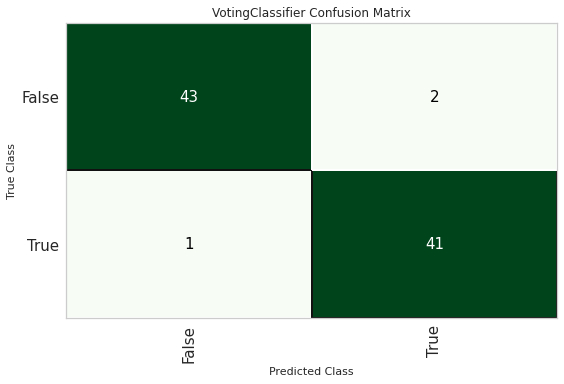

In [14]:
stack = blend_models(top, optimize='Accuracy')
#stack = ensemble_model(top, method = 'Bagging')
predict_model(stack)
final_stack = finalize_model(stack)

plot_model(final_stack, plot = 'confusion_matrix')

In [15]:
import gc
gc.collect()
predictions = predict_model(final_stack, data=test_data)

In [16]:
print(predictions.head)

<bound method NDFrame.head of      PassengerId HomePlanet CryoSleep    Destination   Age    VIP  \
0        0013_01      Earth      True    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True    55 Cancri e  31.0  False   
3        0021_01     Europa     False    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False    TRAPPIST-1e  20.0  False   
...          ...        ...       ...            ...   ...    ...   
4272     9266_02      Earth      True    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True    55 Cancri e  26.0  False   
4275     9273_01     Europa     False            NaN  26.0  False   
4276     9277_01      Earth      True  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  \
0             0.0        0.0           0.0     0.0     0.0   

In [17]:
transported_predictions = predictions
submission = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv", index_col='PassengerId')

submission['Transported'] = predictions["Label"].to_numpy()
submission.to_csv('/kaggle/working/submission.csv')
print(submission.head)
print("Your submission was successfully saved!")

<bound method NDFrame.head of             Transported
PassengerId            
0013_01            True
0018_01           False
0019_01            True
0021_01            True
0023_01            True
...                 ...
9266_02            True
9269_01           False
9271_01            True
9273_01            True
9277_01            True

[4277 rows x 1 columns]>
Your submission was successfully saved!
